In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import tensorflow_hub as hub

In [13]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [15]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1,1))))
transformed_df = pd.DataFrame(data, columns= df.columns)

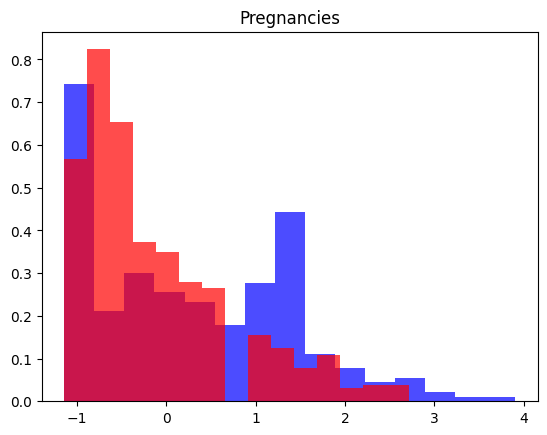

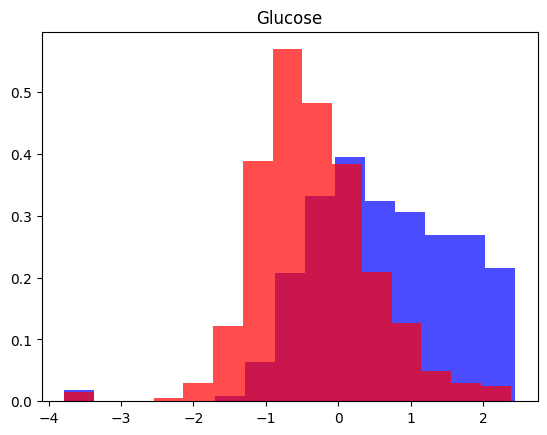

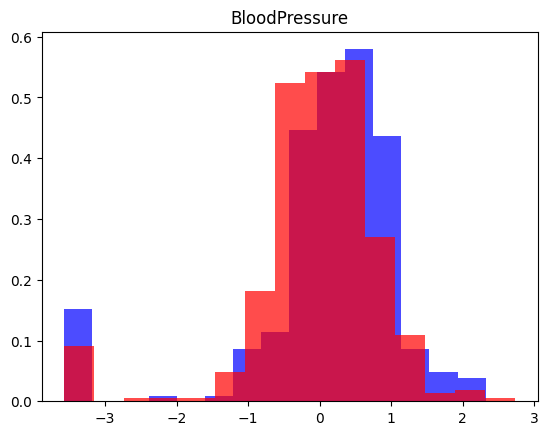

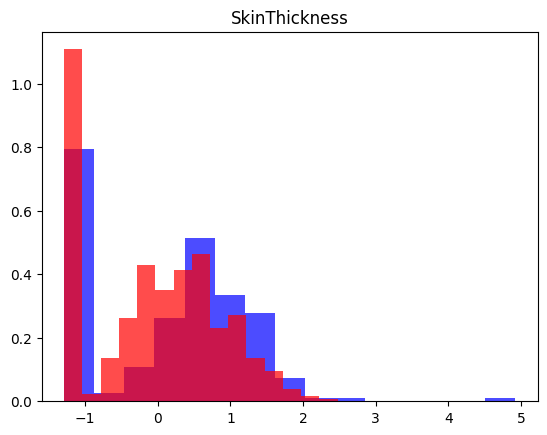

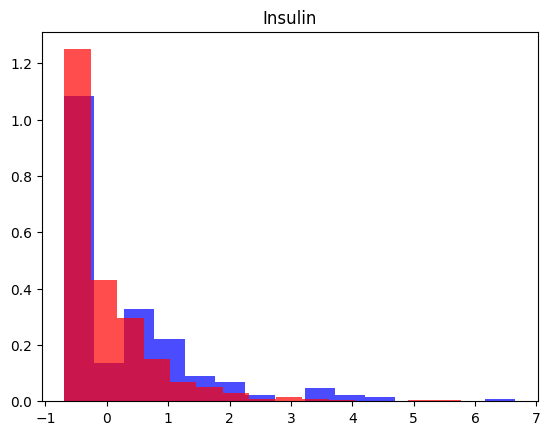

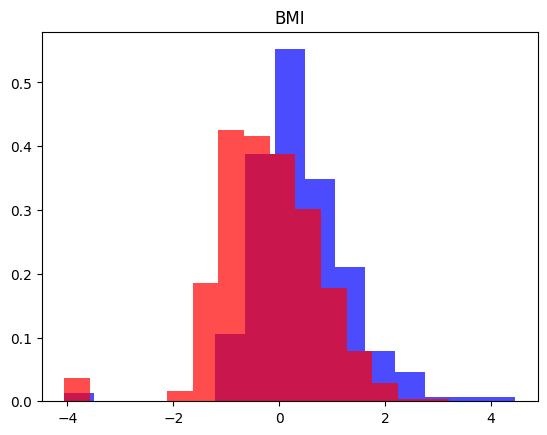

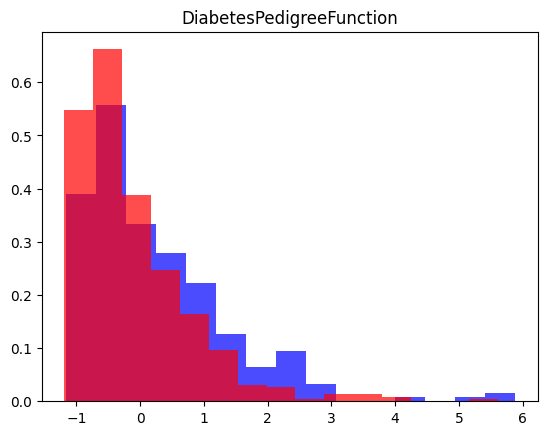

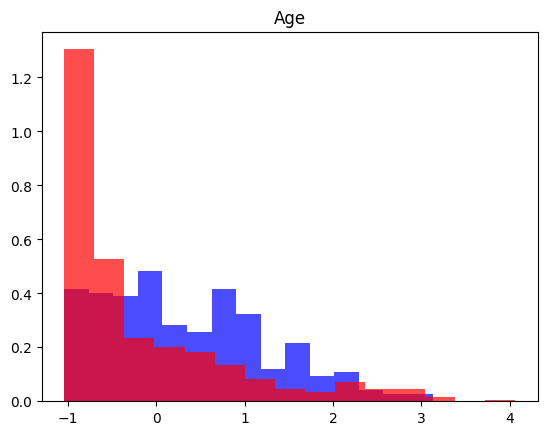

In [ ]:
for i in range(len(df.columns[:-1])):
    label = df.columns[i]
    plt.hist(transformed_df[transformed_df['Outcome'] == 1][label], color = 'blue', alpha = 0.7, density=True, bins =15)
    plt.hist(transformed_df[transformed_df['Outcome'] == 0][label], color = 'red', alpha = 0.7, density=True, bins =15)
    plt.title(label)
    plt.show()  


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])

In [20]:
model.evaluate(x_train, y_train)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4041 - loss: 0.7741  


[0.7721817493438721, 0.40434783697128296]

In [21]:
model.fit(x_train, y_train, batch_size=16, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4815 - loss: 0.7325 - val_accuracy: 0.6558 - val_loss: 0.6628
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6569 - loss: 0.6515 - val_accuracy: 0.6558 - val_loss: 0.6160
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6158 - loss: 0.6287 - val_accuracy: 0.6429 - val_loss: 0.5894
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6781 - loss: 0.5586 - val_accuracy: 0.6494 - val_loss: 0.5691
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7068 - loss: 0.5228 - val_accuracy: 0.6818 - val_loss: 0.5556
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7292 - loss: 0.5034 - val_accuracy: 0.6948 - val_loss: 0.5441
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7480 - loss: 0.5071 - val_accuracy: 0.6753 - val_loss: 0.5359
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7483 - loss: 0.4926 - val_accuracy: 0.7273 - val_loss: